In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data/Sample - Superstore.xls')

In [3]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2020-103800,2020-01-03,2020-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2020-112326,2020-01-04,2020-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,3,US-2020-112326,2020-01-04,2020-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,4,US-2020-112326,2020-01-04,2020-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,5,US-2020-141817,2020-01-05,2020-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10189,10190,US-2023-143259,2023-12-30,2024-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
10190,10191,US-2023-115427,2023-12-30,2024-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750
10191,10192,US-2023-156720,2023-12-30,2024-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,...,80538,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048
10192,10193,US-2023-143259,2023-12-30,2024-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279


In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Визначаємо перший день замовлення для кожного клієнта
first_order = df.groupby('Customer ID')['Order Date'].transform('min')

# Різниця у днях від першого замовлення
days_diff = (df['Order Date'] - first_order).dt.days

# Квартал від першого замовлення (приблизно 90 днів = 1 квартал)
df['QuarterPast'] = (days_diff // 90 + 1).astype(int)

# Визначаємо квартал першого замовлення (для позначення когорти)
df['CohortQuarter'] = first_order.dt.to_period('Q')

In [5]:
# Групуємо по когорті та “віку” когорт і сумуємо продажі
cohort_data = df.groupby(['CohortQuarter', 'QuarterPast'])['Sales'].sum().reset_index()

# Кумулятивна сума продажів по кожній когорті
cohort_data['CumulativeSales'] = cohort_data.groupby('CohortQuarter')['Sales'].cumsum()
cohort_data

,CohortQuarter,QuarterPast,Sales,CumulativeSales
0,2020Q1,1,81477.0160,81477.0160
1,2020Q1,2,10381.8336,91858.8496
2,2020Q1,3,28681.6050,120540.4546
3,2020Q1,4,27109.2624,147649.7170
4,2020Q1,5,8866.4335,156516.1505
...,...,...,...,...
133,2023Q2,1,64.7150,64.7150
134,2023Q2,2,65.8560,130.5710
135,2023Q3,1,2408.3280,2408.3280
136,2023Q3,2,238.6840,2647.0120


In [6]:
cohort_pivot = cohort_data.pivot(index='CohortQuarter', columns='QuarterPast', values='CumulativeSales')
cohort_pivot

QuarterPast,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
CohortQuarter,,,,,,,,,,,,,,,,,
2020Q1,81477.0160,91858.8496,120540.4546,147649.7170,156516.1505,178432.7015,201803.0705,222751.4813,237760.9963,260602.7403,296097.9633,314623.9753,336075.6753,359888.8417,387639.6679,421682.3069,421740.2909
2020Q2,83743.0640,113067.8150,142360.8330,165970.2910,180640.3850,225310.3210,249257.3882,288076.9762,313447.0182,348379.2302,384019.0192,403760.2620,428612.5028,477140.0548,513925.4780,514052.4580,NaN
2020Q3,113320.6993,134750.3198,154701.1008,168364.8268,197650.6228,237488.4258,248268.7988,271250.2448,304710.1916,341622.8184,362533.2769,391826.4959,454009.6441,490675.1581,490733.1781,NaN,NaN
2020Q4,85972.8507,103183.4057,121756.0347,157305.6759,176390.6166,202178.7226,218746.1866,265961.6031,313945.7531,342468.5361,363166.2396,415762.0316,455926.8936,456231.4256,NaN,NaN,NaN
2021Q1,21206.8812,25876.9617,30038.2267,35354.5067,38073.1427,39853.8317,47432.8922,59187.5202,62575.9326,69278.1886,85507.3346,89201.0106,NaN,NaN,NaN,NaN,NaN
2021Q2,14269.8180,20449.6000,31093.9070,35768.2900,50204.0500,62241.4926,66822.5066,69484.5796,72661.1316,80089.9806,90076.2886,NaN,NaN,NaN,NaN,NaN,NaN
2021Q3,19257.2710,26750.5310,28030.9390,35922.7920,38110.1140,45805.1410,54968.1490,66645.2620,77396.2160,80701.5800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021Q4,17007.5475,19321.5595,25360.3435,31520.5763,35490.0563,38387.3903,46574.0323,52765.2393,59330.0031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022Q1,10155.0340,10447.5220,13147.0180,14914.6730,23064.9290,25078.1610,31267.3510,33621.2728,33655.8968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
cohort_pivot = round(cohort_pivot / 1000, 0)

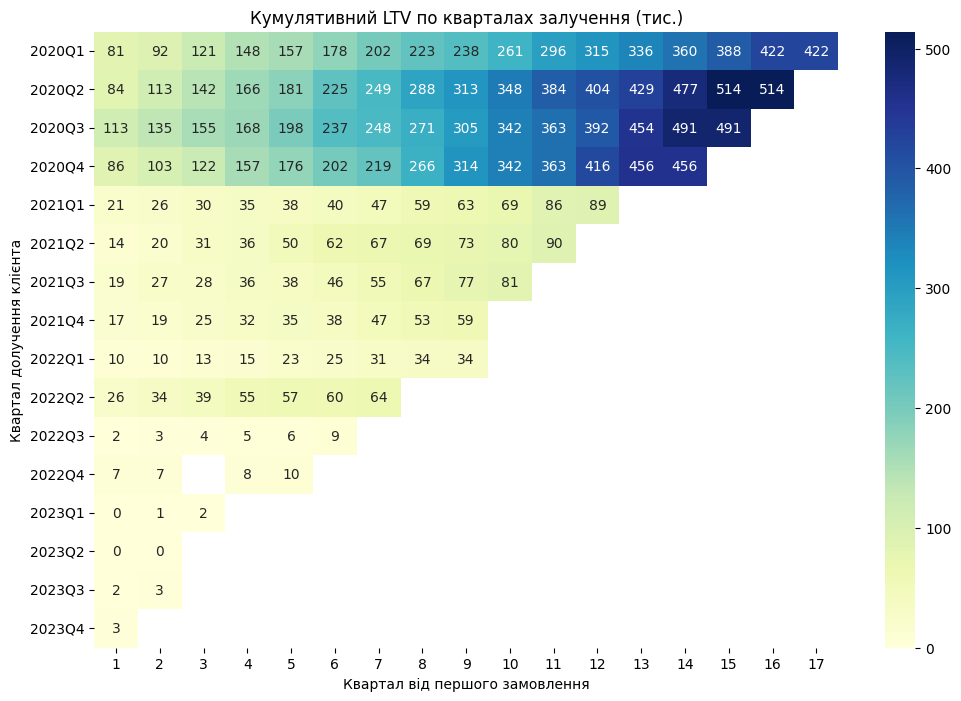

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Кумулятивний LTV по кварталах залучення (тис.)")
plt.ylabel("Квартал долучення клієнта")
plt.xlabel("Квартал від першого замовлення")
plt.show()

In [9]:
cohort_sizes = (
    df
    .groupby('CohortQuarter')['Customer ID']
    .nunique()
    .rename('Customers')
)

In [10]:
cohort_data = (
    df
    .groupby(['CohortQuarter', 'QuarterPast'])
    .agg(
        TotalLTV=('Sales', 'sum'),
        Customers=('Customer ID', 'nunique')
    )
    .reset_index()
)

# Кумулятивний LTV
cohort_data['CumulativeLTV'] = (
    cohort_data
    .groupby('CohortQuarter')['TotalLTV']
    .cumsum()
)

# Середній LTV на клієнта
cohort_data['AvgLTV'] = (
    cohort_data['CumulativeLTV'] /
    cohort_data.groupby('CohortQuarter')['Customers'].transform('max')
)


In [11]:
avg_ltv_pivot = cohort_data.pivot(
    index='CohortQuarter',
    columns='QuarterPast',
    values='AvgLTV'
)

In [12]:
avg_ltv_pivot

QuarterPast,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
CohortQuarter,,,,,,,,,,,,,,,,,
2020Q1,662.414764,746.819915,980.003696,1200.404203,1272.489028,1450.672370,1640.675370,1810.987653,1933.016230,2118.721466,2407.300515,2557.918498,2732.322563,2925.925542,3151.542015,3428.311438,3428.782853
2020Q2,520.143255,702.284565,884.228776,1030.871373,1121.989969,1399.442988,1548.182535,1789.297989,1946.875889,2163.846150,2385.211299,2507.827714,2662.189458,2963.602825,3192.083714,3192.872410,NaN
2020Q3,690.979874,821.648291,943.299395,1026.614798,1205.186724,1448.100157,1513.834139,1653.964907,1857.988973,2083.065966,2210.568762,2389.185951,2768.351488,2991.921696,2992.275476,NaN,NaN
2020Q4,547.597775,657.219145,775.516145,1001.946980,1123.507112,1287.762564,1393.287813,1694.022950,1999.654478,2181.328255,2313.160762,2648.165806,2903.992953,2905.932647,NaN,NaN,NaN
2021Q1,662.715037,808.655053,938.694584,1104.828334,1189.785709,1245.432241,1482.277881,1849.610006,1955.497894,2164.943394,2672.104206,2787.531581,NaN,NaN,NaN,NaN,NaN
2021Q2,419.700529,601.458824,914.526676,1052.008529,1476.589706,1830.632135,1965.367841,2043.664106,2137.092106,2355.587665,2649.302606,NaN,NaN,NaN,NaN,NaN,NaN
2021Q3,566.390324,786.780324,824.439382,1056.552706,1120.885706,1347.210029,1616.710265,1960.154765,2276.359294,2373.575882,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021Q4,548.630565,623.276113,818.075597,1016.792784,1144.840526,1238.302913,1502.388139,1702.104494,1913.871068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022Q1,677.002267,696.501467,876.467867,994.311533,1537.661933,1671.877400,2084.490067,2241.418187,2243.726453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
avg_ltv_pivot = round(avg_ltv_pivot / 10, 1)

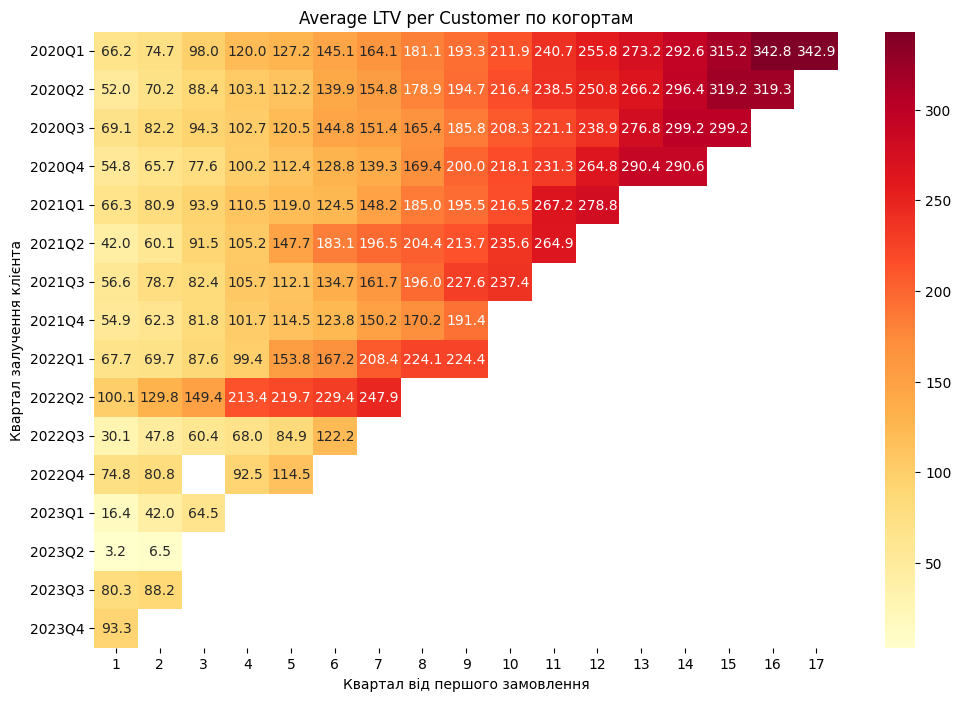

In [14]:

plt.figure(figsize=(12, 8))
sns.heatmap(
    avg_ltv_pivot,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd"
)
plt.title("Average LTV per Customer по когортам")
plt.xlabel("Квартал від першого замовлення")
plt.ylabel("Квартал залучення клієнта")
plt.show()
